In [ ]:
import tensorflow
tensorflow.__version__

'2.10.0'

# 합성곱 신경망(Convolutional Neural Network,CNN)
* 컨볼루션 신경망이라고도 합니다. 
* 주로 이미지나 영상 데이터를 처리할 때 쓰입니다. 
* 기본 딥러닝 프레임에 Convolution이라는 전처리 작업이 들어가는 Neural Network 모델입니다. 

**왜 CNN이라는 방법을 쓰기 시작했나요?**
* 일반 DNN은 1차원 데이터를 사용합니다. 
* 1024 x 1024 2차원 이미지 데이터를 flatten시켜서 한 줄 데이터로 만들어야 합니다. 
* 이때, 이미지의 공간적/지역적 정보가 손실됩니다. 
* 이미지 사이즈가 크면 클 수록 학습시간과 능률의 효율성이 저하됩니다. 

**CNN은 이미지를 어떻게 처리하나요?**
* 이미지를 날 것 그대로 받아서, 공간적/지역적 정보를 유지한 채 특성(feature)들을 추출하여 모읍니다. 
* CNN의 중요 포인트는 이미지 전체보다는 **부분**을 보는 것입니다. 
* 이미지의 한 픽셀과 주변 픽셀들의 연관성을 살리는 것입니다. 


새 인지 아닌지 구분하는 모델을 만든다라고 가정하면,
* 새의 주요 특징인 새의 부리가 중요한 포인트가 될 수 있습니다. 
* 이미지의 특징을 추출하는 데 있어 이미지의 전체 보다는 
* 다양한 관점(색상,선,면,경계면 등)으로 부분적으로 잘라 보는게 더 효율적입니다. 
* 그것을 CNN이 해줍니다. 





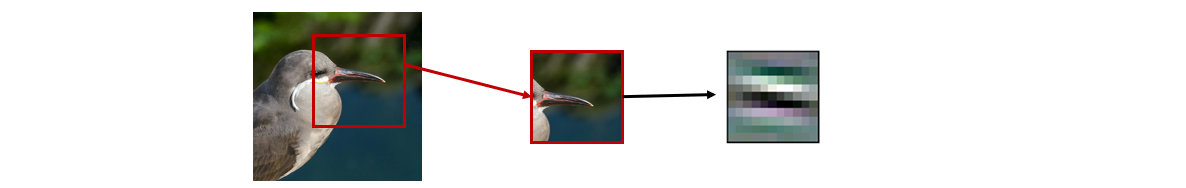

## CNN의 주요 컨셉들

### 컨볼루션(Convolution)

* 2차원 이미지는 픽셀 단위로 구성되어 있고,아래의 그림은 28x 28 matrix로 표현합니다. 
* 그리고 이미지는 결국 오른쪽 처럼 숫자로 이루어져 있습니다. (28x28의 일부만 표현했음)

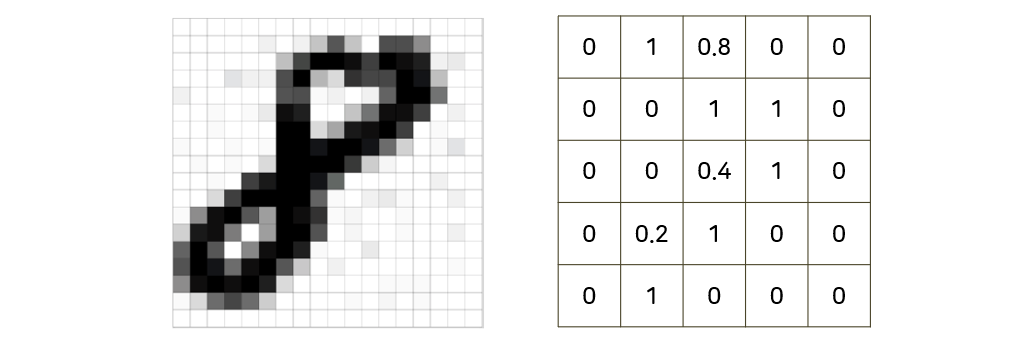

* 5X5의 matrix로 표현된 이미지 입력값이 있다고 가정합니다. 
* 이미지를 부분적으로 잘라보는 역할을 하는 것이 **필터(filter) 또는 커널(Kernel)** 이라고 합니다. 
* 3x3크기의 필터를 사용하여 이미지를 전체적으로 훑어 줍니다. 
* 즉, **입력값 이미지의 모든 영역에 같은 필터를 반복 적용해 패턴을 찾아 처리하는 것이 목적**입니다.  
* 훑어줄때 matrix간의 연산이 일어나며,각 위치에 있는 숫자를 곱하고 모두 더해 줍니다. 
* 핑크 matrix는 **feature map**으로 필터를 통과한 이미지의 특징을 모은 결과물이고, 이렇게 새로 만들어진 층을 **컨볼루션(합성곱)**이라고 부릅니다.
* 그 크기는 3X3으로, 원래 이미지에서 사이즈가 줄어들었고, 이것은 **정보의 소실**을 의미합니다. 
* 커널의 크기는 우리가 정해줘야할 하이퍼파라미터입니다. 

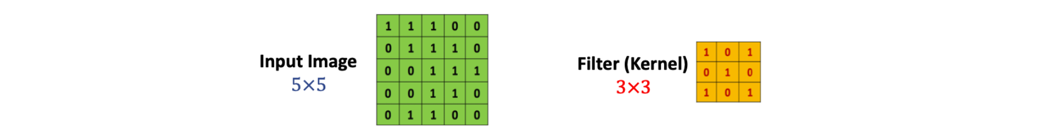

<center>
<img src="https://i.stack.imgur.com/xdXTn.gif" width="400" height="300"  />
</center>

```python
from keras.layers import Conv2D
Conv2D(필터의 개수, 커널크기, activation='relu')
Conv2D(64, kernel_size=(3, 3), activation='relu')

#커널의 크기는 보통 (3,3) 또는 (5,5)권장
```

### 패딩(Padding)

* 컨볼루션의 결과물의 크기가 3X3으로 줄어들었다는 것은 손실이 발생한 것입니다. 
* 각 모서리의 픽셀 4개는 딱 한번 연산에 참여하고, --> 모서리에 있는 중요한 정보가 특성맵에 잘 전달이 안 된다는 뜻
* 중앙 픽셀은 9번 연산에 참여한다. 가운데 정보는 두드러지게 표현된다는 뜻
* 이를 막기 위해서 패딩이란 방법을 사용합니다.
* 주로 제로 패딩을 사용합니다. (0으로 채우는 것)
* 패딩의 목적은 결국 정보의 입력값과 컨볼루션 후의 결과값의 크기를 같게하는 것입니다. (정보 손실 없도록)

<center>
<img src="https://miro.medium.com/max/1400/1*O06nY1U7zoP4vE5AZEnxKA.gif" width="600" height="300"  />
</center>

```python
#padding='valid' 기본값
#padding='same' 0으로 채워 특성맵과 사이즈 동일하게 만듬
Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same') 

```

### 스트라이드(Stride)

* 필터를 얼마 만큼 움직여 주는가에 대한 것입니다. 
* stride가 1이면 한칸씩 움직여 줍니다. 

```python
#stride = 1 이외의 값은 잘 사용하지 않음
Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',stride=1) 

```

### 맥스풀링(Max pooling)

* 컨볼루션 층에서 여러 개의 필터(16, 32, 64, 128개 등)를 사용해서 특징을 추출하고 나면 그 결과가 크고 복잡할 수 있습니다. 
* 이를 **축소** 해야 하는데 그 방법을 **풀링(Pooling)** 이라고 합니다. 
* 풀링 기법에는 정해진 구역 안에서 최대값을 뽑아내는 **맥스 풀링(max pooling)** 과 
* 평균값을 뽑아내는 **평균 풀링(average pooling)** 등이 있습니다. 
* 일반적으로 맥스 풀링을 사용합니다. (모인 특징요소 중에서 제일 강한 것만 다시 모을 수 있음)

<center>
<img src="https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif" width="400" height="200"  />
</center>


```python
#풀링의 크기 2 -> 특성맵을 반으로 줄이게 됨
MaxPooling2D((2, 2))

```

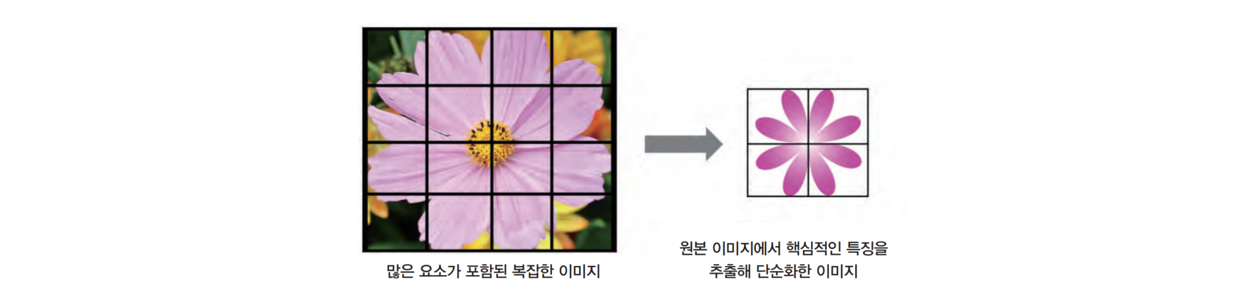

### 3D 텐서

* 컬러이미지는 r,g,b 세가지 채널로 구성되어 있습니다.
* 커널 또한 3D 텐서로 이루어져 있고 이는 2D 이미지에서와 마찬가지로 연산을 통해 특성요소 한개로 축약하여 추출합니다.
* 채널 수와 상관없이 커널 한 개당 한 개의 feature map을 완성하게 됩니다. 

<center>
<img src="https://www.researchgate.net/profile/Santhiya-Rajan/post/How-will-channels-RGB-effect-convolutional-neural-network/attachment/5c67b72d3843b0544e664e12/AS%3A726829115666434%401550300973344/download/cnn_1.gif" width="600" height="300"  />
</center>

## CNN을 이용하면...

* 여러 종류의 필터를 CNN 내부에서 자동으로 선정해서 특징을 추출해 줍니다. 
* 내가 훑은 픽셀 영역에 찾고자 하는 대상이 있는지 없는지 판별하고,
* 대상이 있는 경우 연산의 결과가 크고, 없을 경우 연산의 결과가 0에 수렴하게 됩니다. 

<center>
<img src="https://i.stack.imgur.com/9bi5k.gif" width="800" height="300"  />
</center>

## 필터들의 효과

https://setosa.io/ev/image-kernels/

## CNN 전체 구성

* convolution layer와 max pooling layer를 반복적으로 쌓아서 특징 추출(feature extraction) layer를 구성합니다.
* 주로 각 단계(conv + Relu + pooling)가 지나면서 이미지가 점점 고차원으로 압축되고,
* 점 -> 선-> 부위-> 물체등의 계층적 특징을 잡아나갑니다.
* Fully Connected layer는 분류를 위한 딥러닝 층을 구성합니다. 
* [CNN Explainer]https://poloclub.github.io/cnn-explainer/

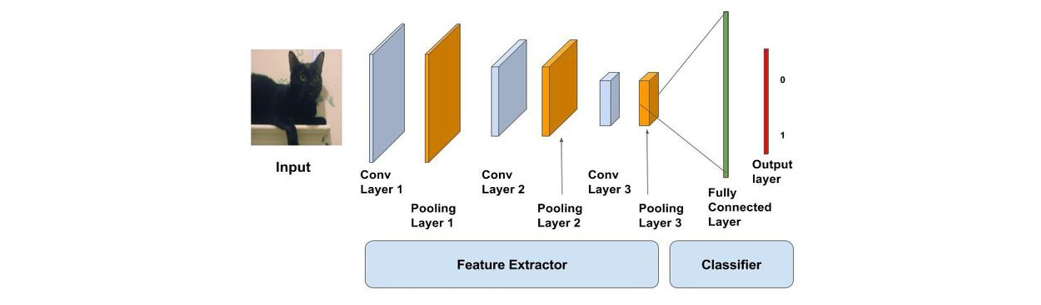

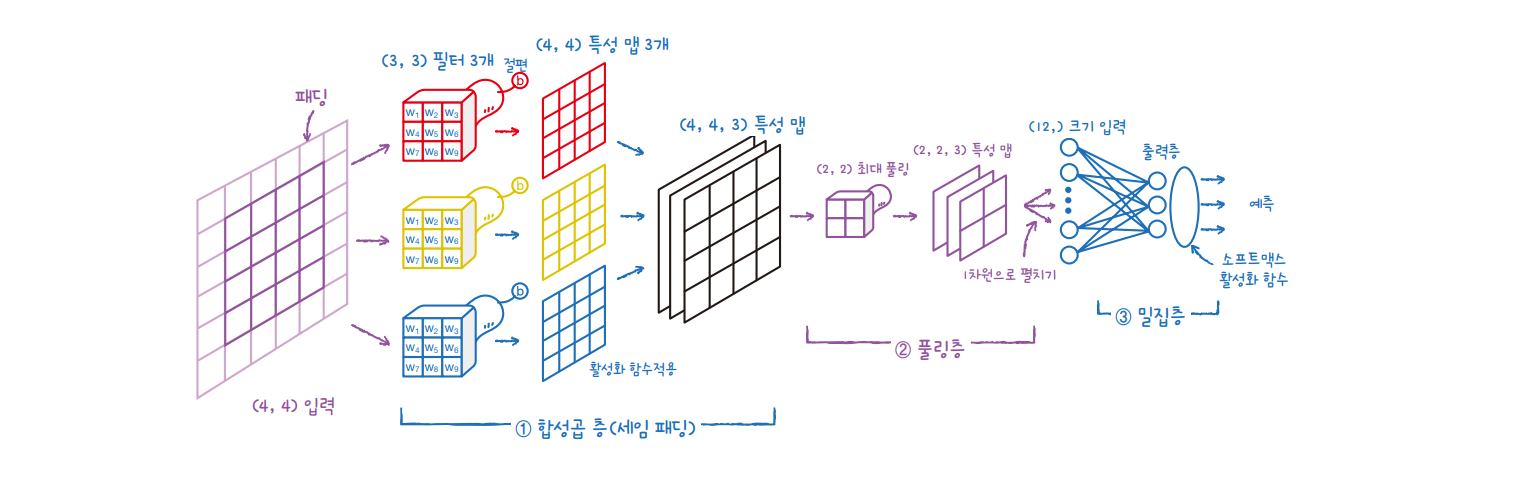

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

Mounted at /content/drive
/content/drive/Othercomputers/내 노트북/Devpy_work/02.멀티캠퍼스


# 합성곱 신경망 만들기

* 패션 MNIST 이미지 분류를 완전 연결 네트워크(densely connected network)로 풀었더니 테스트 정확도는 88.7%였습니다.
* 패션 MNIST 이미지 분류에 컨브넷을 사용해 보겠습니다.
* 기본적인 컨브넷 `Conv2D`와 `MaxPooling2D` 층을 쌓아 올렸습니다.
* 컨브넷이 `(image_height, image_width, image_channels)` 크기의 입력 텐서를 사용한다는 점이 중요합니다(배치 차원은 포함하지 않습니다)
* MNIST 이미지 포맷인 `(28, 28, 1)` 크기의 입력을 처리하도록 컨브넷을 설정해야 합니다.

## 데이터 로드

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## 합성곱 층 만들기

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import models

In [ ]:
#패딩을 없애면


In [ ]:
#필터의 수를 늘리면


In [ ]:
# 32개 필터로 특징 추출 1차 시도


In [ ]:
# 1개 필터로 특징 추출 2차 시도

# 네트워크 출력


In [ ]:
# 64개 필터로 특징 추출 2차 시도


# 네트워크 출력


* `Conv2D`와 `MaxPooling2D` 층의 출력은 `(height, width, channels)` 크기의 3D 텐서입니다. 
* 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있습니다.
* 채널의 수는 `Conv2D` 층에 전달된 첫 번째 매개변수에 의해 조절됩니다(32개 또는 64개).
* 다음 단계에서 마지막 층의 (`(7, 7, 64)` 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 
* 이 네트워크는 이미 익숙하게 보았던 `Dense` 층을 쌓은 분류기입니다. 
* 이 분류기는 1D 벡터를 처리하는데 이전 층의 출력이 3D 텐서입니다. 
* 그래서 먼저 3D 출력을 1D 텐서로 펼쳐야 합니다. 

## 완전 연결층 만들기

In [ ]:
#완전 연결층


# 10개의 클래스로 분류하는 다중분류의 경우 맨 마지막 출력 크기는 10, 활성화 함수는 소프트맥스

In [ ]:
# 전체 네트워크


> * `(7, 7, 64)` 출력이 `(3136,)` 크기의 벡터로 펼쳐진 후 `Dense` 층으로 주입되었습니다.

## 모델 설정 및 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/mnist-fashion-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, y_train, epochs=20,batch_size=128,
                    validation_data=(val_scaled, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
 # 모델 평가
model.evaluate(val_scaled, y_val)

* 완전 연결 네트워크는 88%의 테스트 정확도를 얻은 반면, 
* 기본적인 컨브넷은 92.3%의 테스트 정확도를 얻었습니다. 
* 기본 컨브넷만으로도 성능이 좋아졌습니다. 

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

# 종합코드

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split